<a href="https://colab.research.google.com/github/Moykerino/AIDA/blob/main/REGRESSION_PRACTICAL_MIDTERMS/Midterm_Practical_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sustento, Myke Alvin E.

201911709

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

#Getting and Reading the Dataset

In [2]:
GSFinances = "https://github.com/Moykerino/AIDA/blob/main/REGRESSION_PRACTICAL_MIDTERMS/Global%20Sport%20Finances.xlsx?raw=true" # Link of dataset
TopTeamsPayrollList = 0 # Sheet1
TopAthleteSalaries = 1 # Sheet2

TeamPayroll_df = pd.read_excel(GSFinances, sheet_name = TopTeamsPayrollList)
AthleteSalary_df = pd.read_excel(GSFinances, sheet_name = TopAthleteSalaries)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
TeamPayroll_df

,Rank,Last Year's Rank,"Team, League",Average Annual pay per player,% change from last year's survey,Total Payroll,Rank of Total Payroll,Average player 5 year earnings,% change over last 5 years
0,1,1,"Manchester City, EPL",8109912,0.6,202747812,3,31660772.0,265.0
1,2,5,"New York Yankees, MLB",8031948,12.3,208830659,2,35789052.0,5.0
2,3,2,"Los Angeles Dodgers, MLB",7778336,4.1,241128402,1,26226200.0,79.0
3,4,3,"Real Madrid, La Liga",7586438,3.7,189660944,5,36995660.0,9.0
4,5,4,"Barcelona, La Liga",7446562,2.4,193610600,4,37975600.0,12.0
...,...,...,...,...,...,...,...,...,...
289,290,),"Hangzhou Greentown, CSL",83529,NaN,2840000,290,NaN,NaN
290,291,278,"Inverness Caledonian Thistle, SPL",80847,6.0,2021164,291,381264.0,23.0
291,292,),"Dundee, SPL",71572,NaN,1789307,292,NaN,NaN
292,293,),"Ross County, SPL",59114,NaN,1477850,293,NaN,NaN


In [4]:
AthleteSalary_df

,Athlete,2014 Pay,Salary/Winnings,Endorsements,Sport
0,Floyd Mayweather,$105 M,$105 M,0,Boxing
1,Cristiano Ronaldo,$80 M,$52 M,$28 M,Soccer
2,LeBron James,$72.3 M,$19.3 M,$53 M,Basketball
3,Lionel Messi,$64.7 M,$41.7 M,$23 M,Soccer
4,Kobe Bryant,$61.5 M,$30.5 M,$31 M,Basketball
...,...,...,...,...,...
95,Terrell Suggs,$17.6 M,$17.4 M,$200 K,Football
96,Brandon Marshall,$17.5 M,$16.8 M,$0.7 M,Football
97,Jayson Werth,$17.5 M,$17.3 M,$200 K,Baseball
98,Matt Holliday,$17.4 M,$17.2 M,$200 K,Baseball


#Data Cleaning

In [5]:
# Checking how many null values in columns
print(TeamPayroll_df.isnull().sum())
print(AthleteSalary_df.isnull().sum()) # no null values

Rank                                 0
Last Year's Rank                     0
Team, League                         0
Average Annual pay per player        0
% change from last year's survey    28
Total Payroll                        0
Rank of Total Payroll                0
Average player 5 year earnings      96
% change over last 5 years          97
dtype: int64
Athlete            0
2014 Pay           0
Salary/Winnings    0
Endorsements       0
Sport              0
dtype: int64


In [6]:
# Interpolating Missing/Null Values in Sheet1
TeamPayroll_df = TeamPayroll_df.interpolate()

In [7]:
# verify data cleaning
TeamPayroll_df.isnull().sum()

Rank                                0
Last Year's Rank                    0
Team, League                        0
Average Annual pay per player       0
% change from last year's survey    0
Total Payroll                       0
Rank of Total Payroll               0
Average player 5 year earnings      0
% change over last 5 years          0
dtype: int64

#Descriptive Analysis of the Datasets ( Count, min, max, standard deviation, 75%,50%and 25%)


In [8]:
TeamPayroll_df.describe() #descriptive analysis of sheet 1

,Rank,Average Annual pay per player,% change from last year's survey,Total Payroll,Rank of Total Payroll,Average player 5 year earnings,% change over last 5 years
count,294.000000,2.940000e+02,294.000000,2.940000e+02,294.000000,2.940000e+02,294.000000
mean,147.500000,2.149082e+06,3.205612,5.492969e+07,147.500000,1.040698e+07,29.275510
std,85.014705,1.813923e+06,26.106650,4.651013e+07,85.014705,8.277876e+06,62.244675
min,1.000000,4.235300e+04,-52.400000,1.440000e+06,1.000000,2.895880e+05,-61.000000
25%,74.250000,5.106428e+05,-9.075000,1.152625e+07,74.250000,2.872610e+06,-5.000000
50%,147.500000,2.004924e+06,1.725000,5.324125e+07,147.500000,1.031911e+07,12.588235
75%,220.750000,3.052888e+06,9.675000,8.187199e+07,220.750000,1.492551e+07,36.000000
max,294.000000,8.109912e+06,256.400000,2.411284e+08,294.000000,3.797560e+07,363.000000


In [9]:
AthleteSalary_df.describe() #descriptive analysis of sheet 2

,Athlete,2014 Pay,Salary/Winnings,Endorsements,Sport
count,100,100,100,100,100
unique,100,82,75,48,10
top,Floyd Mayweather,$20.7 M,$18 M,$200 K,Baseball
freq,1,3,4,7,27


#Scatter Plot

In [10]:
TeamPayroll_df.keys() # getting the columns of the dataset

Index(['Rank', 'Last Year's Rank', 'Team, League',
       'Average Annual pay per player', '% change from last year's survey',
       'Total Payroll', 'Rank of Total Payroll',
       'Average player 5 year earnings', '% change over last 5 years'],
      dtype='object')

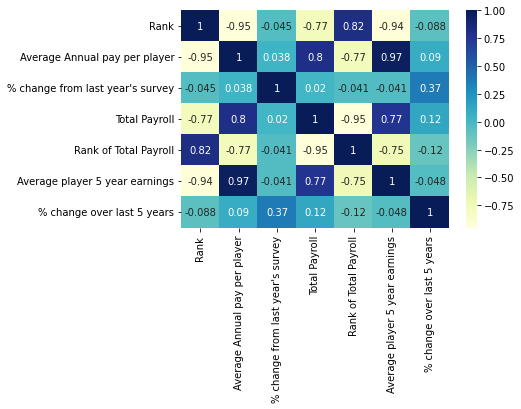

In [11]:
# plotting a heatmap to get correlation within columns of the dataset
# this is to get a correlated x and y variable before scatter plotting
heatmap = sns.heatmap(TeamPayroll_df.corr(), cmap="YlGnBu", annot=True)

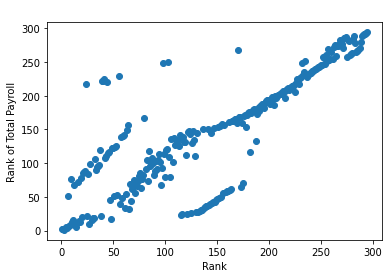

In [12]:
X = TeamPayroll_df['Rank']
Y = TeamPayroll_df['Rank of Total Payroll']
plt.title(' ')
plt.xlabel('Rank')
plt.ylabel('Rank of Total Payroll')
plt.scatter(X, Y)
plt.show()

#Regression Line and Regression Coefficient

In [13]:
y = Y.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)

In [14]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

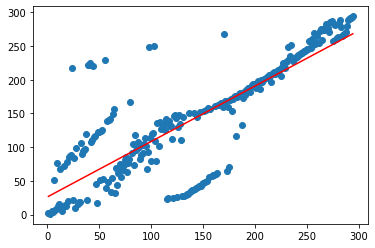

In [15]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [16]:
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
SEED = 69
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [21]:
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print(regressor.intercept_)

[30.02814544]


In [23]:
print(regressor.coef_)

[[0.81100668]]


# Predict Future Values

In [25]:
score = regressor.predict([[9.5]])
print(score) 

[[37.73270892]]


In [26]:
y_pred = regressor.predict(X_test)

In [27]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

    Actual   Predicted
0      161  160.600221
1      206  203.583575
2      178  180.875388
3      216  211.693642
4      278  259.543036
5      140   77.877540
6       18   55.169353
7       72   43.004252
8       30  138.703041
9      173  182.497402
10     267  261.976056
11     164  164.655255
12     202  200.339549
13     245  232.779816
14      68  107.884787
15     266  261.165050
16     209  205.205589
17     148  133.025994
18      67   39.760226
19      64  170.332301
20     190  193.851495
21     105   96.530693
22     198  194.662502
23     165  165.466261
24      58  158.978208
25       7   35.705192
26      26  131.403981
27     293  267.653103
28     248  218.181696
29       4   34.083179
30     238  227.102769
31     228  221.425722
32     100  101.396733
33       1   32.461165
34     199  198.717535
35      43  150.057134
36     119  111.939820
37     285  250.621963
38      61  162.222235
39     163  163.844248
40      94   57.602373
41      66   89.231633
42      77 

# Is linear regression the appropriate method to use to predict future values? Why?

Yes, linear regression gives the strength of relationship between variables and creates a fitting which could be used to predict future outputs from the given data. 